In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print("Libraries imported!")

Libraries imported!


In [3]:
# Change the file name if yours is different (like 'iris.csv' or 'Iris.csv')
df = pd.read_csv('Iris.csv')  

# If your file is in a subfolder, like Perceptron/Iris.csv, use:
# df = pd.read_csv('Perceptron/Iris.csv')

print("Shape of data:", df.shape)
df.head()

Shape of data: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# If your CSV has an 'Id' column (very common), remove it
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Check column names
print("Columns:", df.columns.tolist())

# Make sure species column is called 'Species'
df.head()

Columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Features (the measurements)
X = df.drop('Species', axis=1)  

# Labels (the flower types)
y = df['Species']

print("Features shape:", X.shape)
print("First few feature values:")
print(X.head())

Features shape: (150, 5)
First few feature values:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [6]:
print("Original means:")
print(X.mean())

print("\nOriginal standard deviations:")
print(X.std())

print("\nMin and Max of each feature:")
print(X.describe().loc[['min', 'max']])

Original means:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

Original standard deviations:
Id               43.445368
SepalLengthCm     0.828066
SepalWidthCm      0.433594
PetalLengthCm     1.764420
PetalWidthCm      0.763161
dtype: float64

Min and Max of each feature:
        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
min    1.0            4.3           2.0            1.0           0.1
max  150.0            7.9           4.4            6.9           2.5


In [7]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler on data AND transform it
X_standardized = scaler.fit_transform(X)

# Convert back to pandas DataFrame for easy viewing
X_std_df = pd.DataFrame(X_standardized, columns=X.columns)

print("After Standardization:")
print("Means (should be close to 0):")
print(X_std_df.mean())

print("\nStandard deviations (should be 1):")
print(X_std_df.std())

print("\nFirst 5 rows after standardization:")
X_std_df.head()

After Standardization:
Means (should be close to 0):
Id               0.000000e+00
SepalLengthCm   -4.736952e-16
SepalWidthCm    -6.631732e-16
PetalLengthCm    3.315866e-16
PetalWidthCm    -2.842171e-16
dtype: float64

Standard deviations (should be 1):
Id               1.00335
SepalLengthCm    1.00335
SepalWidthCm     1.00335
PetalLengthCm    1.00335
PetalWidthCm     1.00335
dtype: float64

First 5 rows after standardization:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


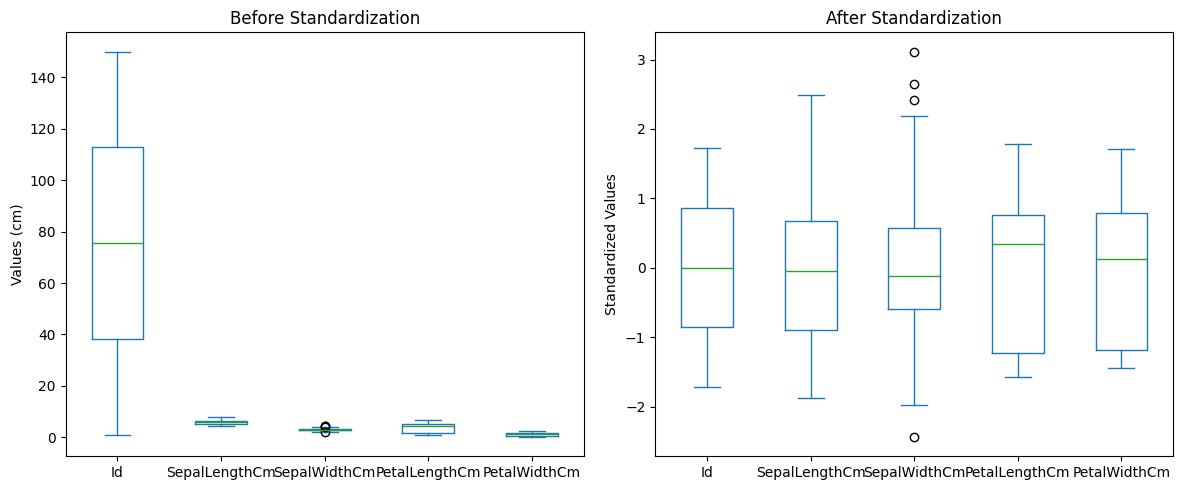

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
X.plot(kind='box', ax=axes[0])
axes[0].set_title('Before Standardization')
axes[0].set_ylabel('Values (cm)')

# After
X_std_df.plot(kind='box', ax=axes[1])
axes[1].set_title('After Standardization')
axes[1].set_ylabel('Standardized Values')

plt.tight_layout()
plt.show()